# Proyecto #1
Análisis de Datos con Python \
**Nombre:** Pablo Santizo\
**Carné:** 24000134\
**Curso** Ciencia de Datos en Python\
**Maestría:** Data Science\
**Universidad:** Galileo, Instituto en Investigación de Operaciones

## En el drive con link https://drive.google.com/drive/folders/1dfVnEWOwlQZ7WunG2NT30HBXnkR6kdFD?usp=drive_link se encuentra el código de este proyecto y el video.

## 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression

Data Frame de la información

In [2]:
file_path = "C:/Users/psantizo/Desktop/Maestría/Ciencia de datos con python/Proyecto1/proyecto_training_data.npy"

dataset = np.load(file_path, allow_pickle=True)
df = pd.DataFrame(dataset)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


Cambiando los nombres

In [3]:
new_names = ['sales', 'mat_qua', 'ffsf','tot_rooms','year_cons','lot_front'] 
df.columns = new_names
df

,sales,mat_qua,ffsf,tot_rooms,year_cons,lot_front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


## Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validación y pruebas(20%).

In [4]:
#Tamaño de la muestra
sample = df.shape[0]
print(f'Los datos tienen {sample} observaciones')

Los datos tienen 1460 observaciones


In [5]:
train_sammple = int(0.8 * sample)
val_sample = sample-train_sammple
print(f'Los datos para entrenar son {train_sammple} y para validar {val_sample}')


Los datos para entrenar son 1168 y para validar 292


In [6]:
df_train = df.iloc[:train_sammple]  # Tomar las primeras train_size filas para entrenamiento
df_val = df.iloc[train_sammple:]
df_train

,sales,mat_qua,ffsf,tot_rooms,year_cons,lot_front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


## 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular(usando numpy o pandas):

In [7]:
stats = pd.DataFrame(columns=['Mean', 'Max', 'Min', 'Range', 'Std'])
for column in df_train.columns:
    mean = round(df[column].mean(),2)
    maxi = round(df[column].max(),2)
    mini = round(df[column].min(),2)
    rango_valor = round(df[column].max() - df[column].min(),2)
    std = round(df[column].std(),2)
    stats.loc[column] = [mean, maxi, mini, rango_valor, std]

print('Las estadisticas generales son las siguientes')
print(stats)

Las estadisticas generales son las siguientes
                Mean       Max      Min     Range       Std
sales      180921.20  755000.0  34900.0  720100.0  79442.50
mat_qua         6.10      10.0      1.0       9.0      1.38
ffsf         1162.63    4692.0    334.0    4358.0    386.59
tot_rooms       6.52      14.0      2.0      12.0      1.63
year_cons    1971.27    2010.0   1872.0     138.0     30.20
lot_front      70.05     313.0     21.0     292.0     24.28


## 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

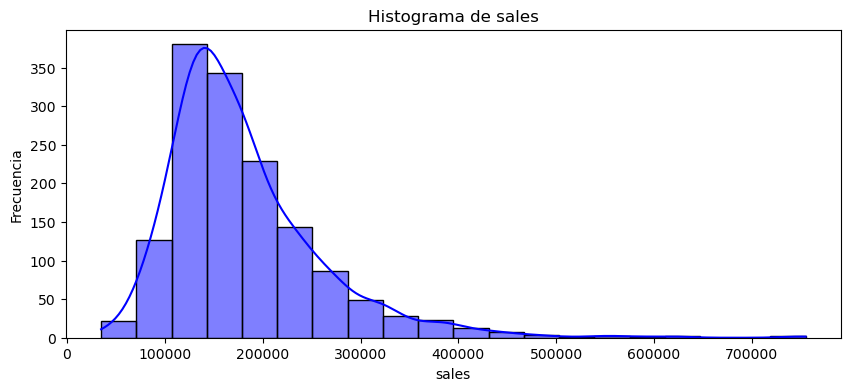

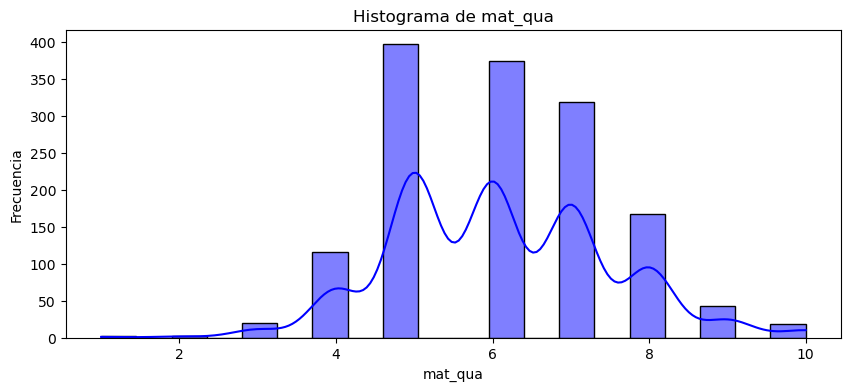

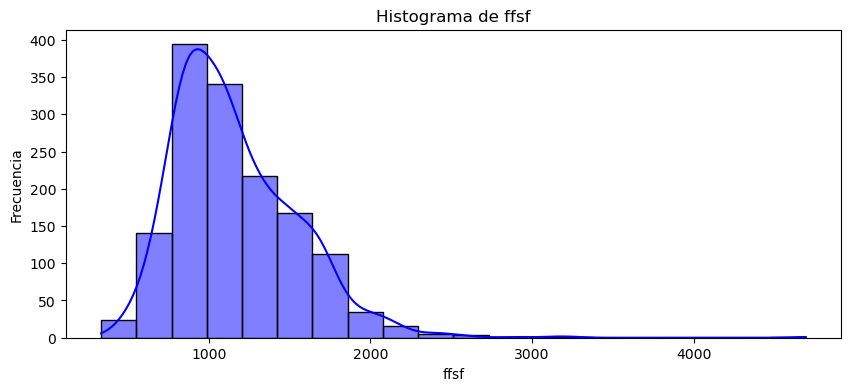

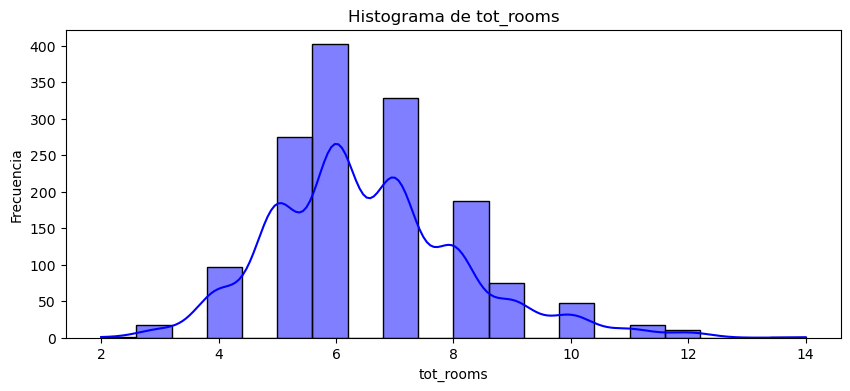

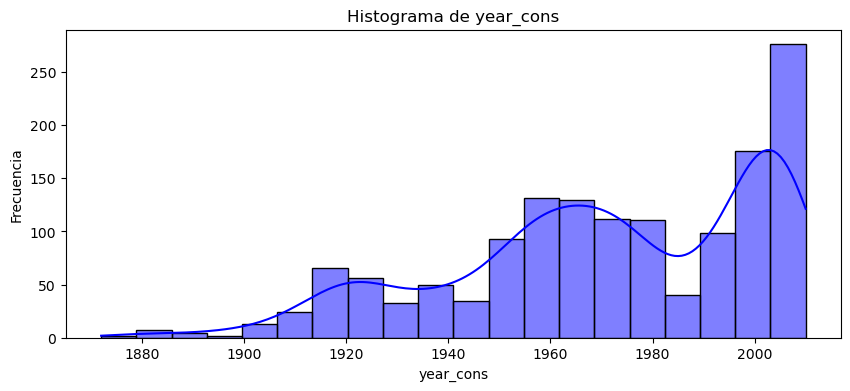

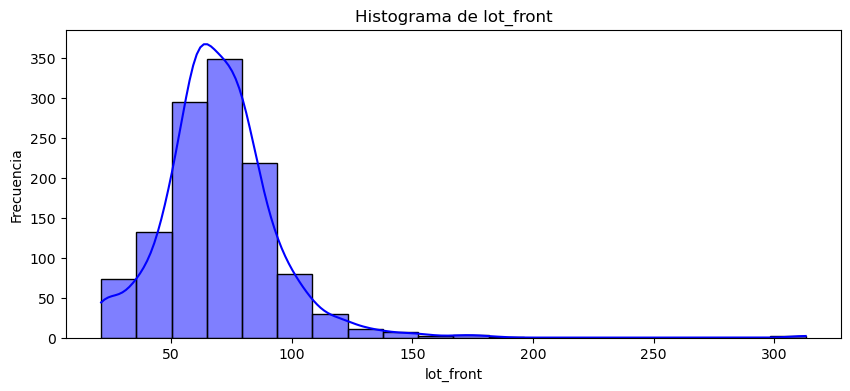

In [8]:
for column in df_train.columns:
    plt.figure(figsize=(10, 4))  
    sns.histplot(df[column], bins=20, kde=True, color='blue') 
    plt.title(f'Histograma de {column}')  
    plt.xlabel(column) 
    plt.ylabel('Frecuencia')  
    plt.show()

## 4. Para cada variable independiente x : calcular el coeficiente de correlacion, graficar e indicar cuales variables tienen mayor correlación con las ventas

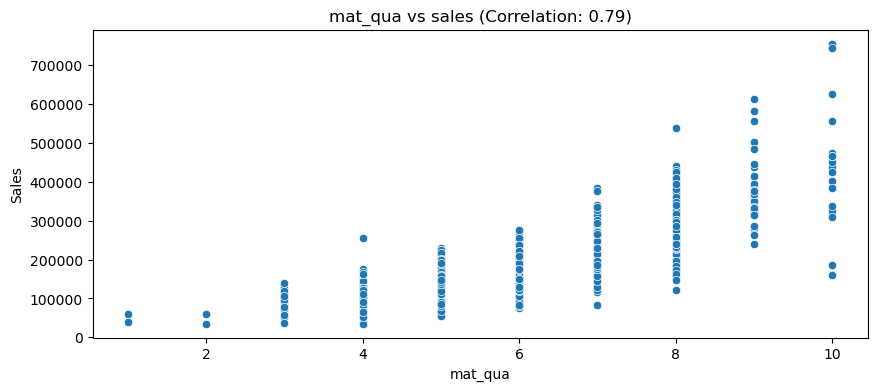

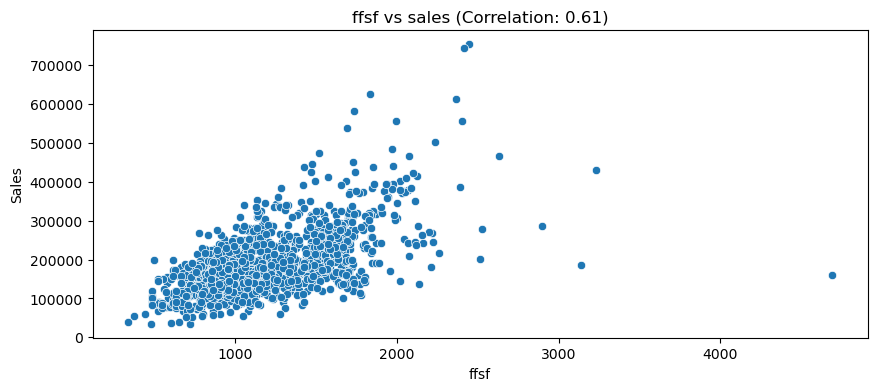

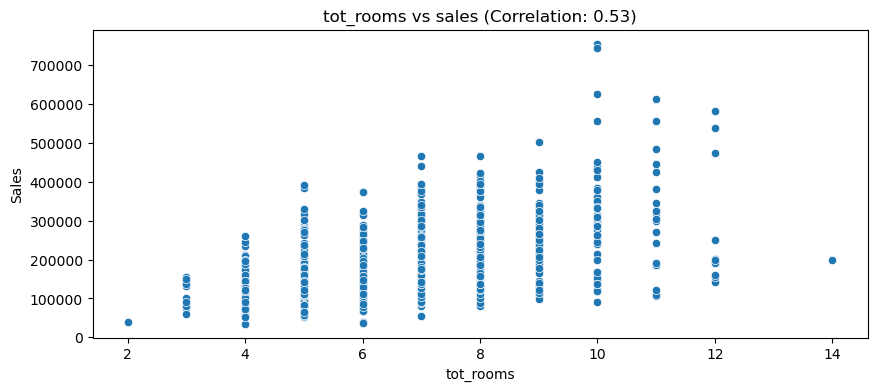

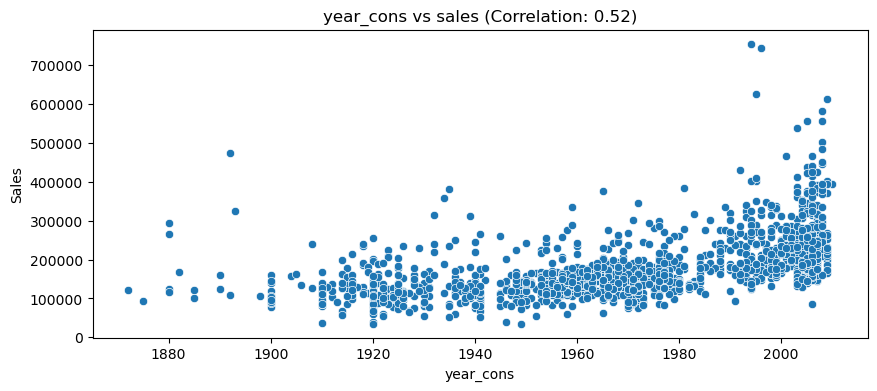

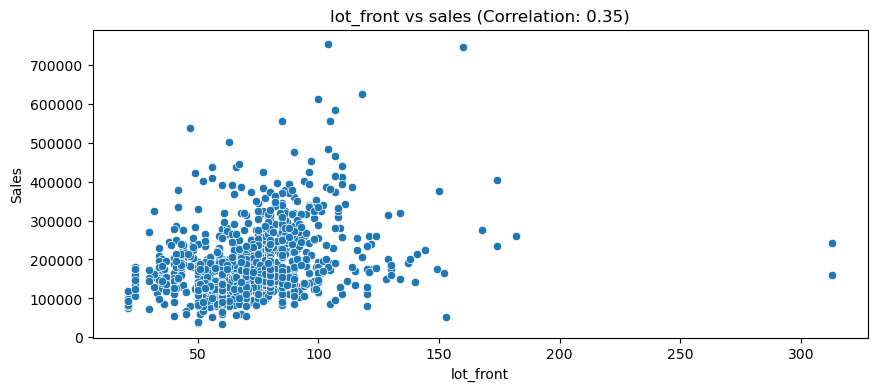

In [9]:
#Identificando las ventas
y = df.iloc[:, 0]  

# Calculando la correlación para las ventas y cada una de las variables independientes
top_corr = {}
for column in df.columns[1:]:
    x = df[column]
    # Para quitar valores NANS
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_filtered = x[mask]
    y_filtered = y[mask]
    
    corr = np.corrcoef(x_filtered, y_filtered)[0, 1]
    top_corr[column] = corr
    
    # Gráfico
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=x_filtered, y=y_filtered)
    plt.title(f'{column} vs sales (Correlation: {corr:.2f})')
    plt.xlabel(column)
    plt.ylabel('Sales')
    plt.show()

In [10]:
top_two = sorted(top_corr, key=top_corr.get, reverse=True)[:2]
print("Las variables conm mayor correlación con las ventas son", top_two)

Las variables conm mayor correlación con las ventas son ['mat_qua', 'ffsf']


## Clase para solucionar los requerimientos 6 y 7

### Una vez detectadas las funciones a utilizar, en este caso son 6 funciones, se realizó la siguiente clase que realiza la interacción entre dichas funciones y los datos de entrada

In [11]:
#definición de la clase del proyecto
class proyecto:
    def __init__(self, x: pd.Series = None, y: pd.Series = None, x2: pd.Series = None, y2: pd.Series = None,beta_0: float = None, beta_1: float = None, epoch: int = 1000, alpha1: float = 0.001, alpha2: float = 0.001, n: int = 10,iteraciones: int=100):
        self.y = y
        self.x = x
        self.y2 = y2
        self.x2 = x2
        self.beta_0 = beta_0
        self.beta_1 = beta_1
        self.epoch = epoch
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.n = n
        self.iteraciones = iteraciones
        self.error_est
        self.grad
# Función calcula el error y brinda y estimado
    def error_est(self,y,x,beta_0,beta_1):

        par_est = np.array([beta_0, beta_1])
        mat = np.column_stack((np.ones_like(x), x))
        y_est = np.dot(mat, par_est)
        error = (1/(2*len(y))) * np.sum(np.square(np.array(y) - y_est))
        return error, y_est
    
# Función calcula el error para una condición inicial, luego ajusta los betas con el gradiente y la tasa de aprendizaje para converger al optimo, su resultado es un dataframe con la estructura de los datos

    def grad(self):
        resultado = {}
        mbeta_0 = self.beta_0  
        mbeta_1 = self.beta_1  
        
        for i in range(1, self.epoch + 1):
            z = self.error_est(x=self.x,y=self.y,beta_0=mbeta_0,beta_1=mbeta_1)
            datos = [i, round(mbeta_0, 2), round(mbeta_1, 2), round(z[0])]
            resultado[f"Iter_{i}"] = datos
            gbeta0 = (1/len(self.y)) * np.sum((z[1] - np.array(self.y)))
            gbeta1 = (1/len(self.y)) * np.sum((z[1] - np.array(self.y)) * np.array(self.x))
            mbeta_0 = mbeta_0 - self.alpha1 * gbeta0
            mbeta_1 = mbeta_1 - self.alpha2 * gbeta1
        res = pd.DataFrame(resultado).T 
        res.columns = ['iter','beta_0','beta_1','error']
        res.index = range(len(res))
        return  res
    
# Función que imprime los resultados cada n interacciones    
    def print_iteracion(self):
        model = self.grad()
        n = self.n
        for i in range(0, len(model), n):  
            row = model.iloc[i]  
            iteration = row['iter']
            beta0 = row['beta_0']
            beta1 = row['beta_1']
            error = row['error']

            print(f'En la iteración {iteration}, beta cero es de {beta0}, beta uno es de {beta1}, y el error es de {error}.')

        # Print the last row inside the loop
        last_row = model.iloc[-1]  
        iteration = last_row['iter']
        beta0 = last_row['beta_0']
        beta1 = last_row['beta_1']
        error = last_row['error']

        print(f'En la iteración {iteration}, beta cero es de {beta0}, beta uno es de {beta1}, y el error es de {error}.')
        
# Función que realiza gráficos sobre el aprendizaje, los errores y los parametros estimados      
    def plot_model_learning(self):
        model = self.grad()
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        variables = ['beta_0', 'beta_1', 'error']
        for i, variable in enumerate(variables):
            data = model[variable]
            axs[i].plot(data)
            axs[i].set_xlabel('Iteración')
            axs[i].set_ylabel(variable.capitalize())
            axs[i].set_title(f'Aprendizaje - {variable.capitalize()}')

        plt.tight_layout()
        plt.show()

    
# Función que grafíca las lineas de cada cierto numero de iteraciones
    def model_lines(self):
        model = self.grad()  
        model_subset = model.iloc[::self.iteraciones]
        model_subset = pd.concat([model_subset, model.iloc[[-1]]])

        plt.figure(figsize=(10, 8))
        plt.scatter(x, y, color='blue', label='Datos')

        colors = plt.cm.viridis(np.linspace(0, 1, len(model_subset)))

        for row, color in zip(model_subset.itertuples(), colors):
            beta_0 = row.beta_0
            beta_1 = row.beta_1

            y_pred = beta_0 + beta_1 * x

            plt.plot(x, y_pred, color=color, alpha=0.5, label=f'n {row.iter}')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Convergencia de la línea de regresión')
        plt.legend(loc='upper left', fontsize='xx-small', ncol=4)
        plt.show()

# Función que con la información de entrada, calcula el modelo de sklearn y realiza las comparaciones con el modelo manual y grafica
    def comparacion(self):
        model = self.grad()  
        beta_0 = model.iloc[-1]['beta_0']
        beta_1 = model.iloc[-1]['beta_1'] 
        py_error = self.error_est(y=self.y2,x=self.x2,beta_0=beta_0, beta_1=beta_1)
        #proyeccion modelo manual
        manual_forecast = py_error[1]
        #estimació con sk
        mat = np.column_stack((np.ones_like(self.x),self.x))
        reg = LinearRegression().fit(mat,np.array(self.y))
        #proyección con sk
        new_mat = np.column_stack((np.ones_like(self.x2),self.x2))
        forecasts = reg.predict(new_mat)

        #Errores para comparar
        error_manual = np.mean(self.y2-manual_forecast)**2
        error_sk = np.mean(self.y2-forecasts)**2
        error_prom = np.mean(self.y2-0.5*forecasts-0.5*manual_forecast)**2

        # Redondear
        error_manual_round = round(error_manual, 2)
        error_sk_round = round(error_sk, 2)
        error_prom_round = round(error_prom, 2)

        # Para plotear 
        errors = [error_manual_round, error_sk_round, error_prom_round]
        modelo = ['Manual', 'sklearn', 'Combinado']

        # betas
        beta0_manual = model.iloc[-1]['beta_0']
        beta0_sk = round(reg.intercept_, 1)
        beta1_manual = model.iloc[-1]['beta_1']
        beta1_sk = round(reg.coef_[1], 1)
        # Para plot de betas
        betas0 = [beta0_manual, beta0_sk]
        betas1 = [beta1_manual, beta1_sk]

        # Graficos
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # errores
        bars = axs[0].bar(modelo, errors, color=['blue', 'green', 'red'])
        axs[0].set_ylabel('Error')
        axs[0].set_title('Comparación de los errores')

        # etiqueta
        for bar, error in zip(bars, errors):
            axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(error),
                        ha='center', va='bottom')

        # beta0
        bars_beta0 = axs[1].bar(['Beta0 (Manual)', 'Beta0 (sklearn)'], betas0, color=['blue', 'green'], alpha=0.6, label='Beta0')
        axs[1].set_ylabel('Beta0')
        axs[1].set_title('Comparación de Beta_0')

        # datos de beta0
        for bar, beta in zip(bars_beta0, betas0):
            axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(beta),
                        ha='center', va='bottom')

        # beta 1
        bars_beta1 = axs[2].bar(['Beta1 (Manual)', 'Beta1 (sklearn)'], betas1, color=['red', 'orange'], alpha=0.6, label='Beta1')
        axs[2].set_ylabel('Beta1')
        axs[2].set_title('Comparación de  Beta_1')

        # datos de beta1
        for bar, beta in zip(bars_beta1, betas1):
            axs[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(beta),
                        ha='center', va='bottom')

        plt.tight_layout()
        plt.show()
        #ver gráfico

## Modelo 1 manual. Ventas y calidad del material

In [12]:
# se definen la avriables a utilizar
y = df_train['sales']
x = df_train['mat_qua']
y2 = df_val['sales']
x2 = df_val['mat_qua']
beta_0 = 0
beta_1 = 0
alpha1= 0.035
alpha2= 0.035
epoch=10000

modelo1_manual = proyecto(x=x, y=y, x2=x2,y2=y2,beta_0=0, beta_1=0,alpha1=alpha1,alpha2=alpha2,epoch=10000,n=200)

La función grad tiene como resultados la estructura de los datos

In [13]:
modelo1_manual.grad()

,iter,beta_0,beta_1,error
0,1.0,0.00,0.00,1.940972e+10
1,2.0,6320.66,41578.17,4.313034e+09
2,3.0,3541.66,24878.02,1.866129e+09
3,4.0,4426.01,31637.05,1.468957e+09
4,5.0,3836.11,28952.81,1.403920e+09
...,...,...,...,...
9995,9996.0,-96469.56,45412.00,1.146916e+09
9996,9997.0,-96469.56,45412.00,1.146916e+09
9997,9998.0,-96469.56,45412.00,1.146916e+09
9998,9999.0,-96469.56,45412.00,1.146916e+09


La función print_iteracion imprime cada cierto numero de resultados

In [14]:
modelo1_manual.print_iteracion()

En la iteración 1.0, beta cero es de 0.0, beta uno es de 0.0, y el error es de 19409722053.0.
En la iteración 201.0, beta cero es de -23913.46, beta uno es de 34082.63, y el error es de 1274582314.0.
En la iteración 401.0, beta cero es de -44396.19, beta uno es de 37280.94, y el error es de 1212675800.0.
En la iteración 601.0, beta cero es de -59096.61, beta uno es de 39576.35, y el error es de 1180788349.0.
En la iteración 801.0, beta cero es de -69647.07, beta uno es de 41223.77, y el error es de 1164363428.0.
En la iteración 1001.0, beta cero es de -77219.12, beta uno es de 42406.11, y el error es de 1155903109.0.
En la iteración 1201.0, beta cero es de -82653.56, beta uno es de 43254.68, y el error es de 1151545280.0.
En la iteración 1401.0, beta cero es de -86553.85, beta uno es de 43863.7, y el error es de 1149300604.0.
En la iteración 1601.0, beta cero es de -89353.08, beta uno es de 44300.78, y el error es de 1148144393.0.
En la iteración 1801.0, beta cero es de -91362.08, beta

In [15]:
print(f'El valor óptimo de beta_0 es de {modelo1_manual.grad().iloc[-1][1]}, el de beta_1 es {modelo1_manual.grad().iloc[-1][2]} y el error {modelo1_manual.grad().iloc[-1][3]}')

El valor óptimo de beta_0 es de -96469.56, el de beta_1 es 45412.0 y el error 1146916219.0


La función plot_model_learning , presenta 3 gráficos con la evolución del modelo

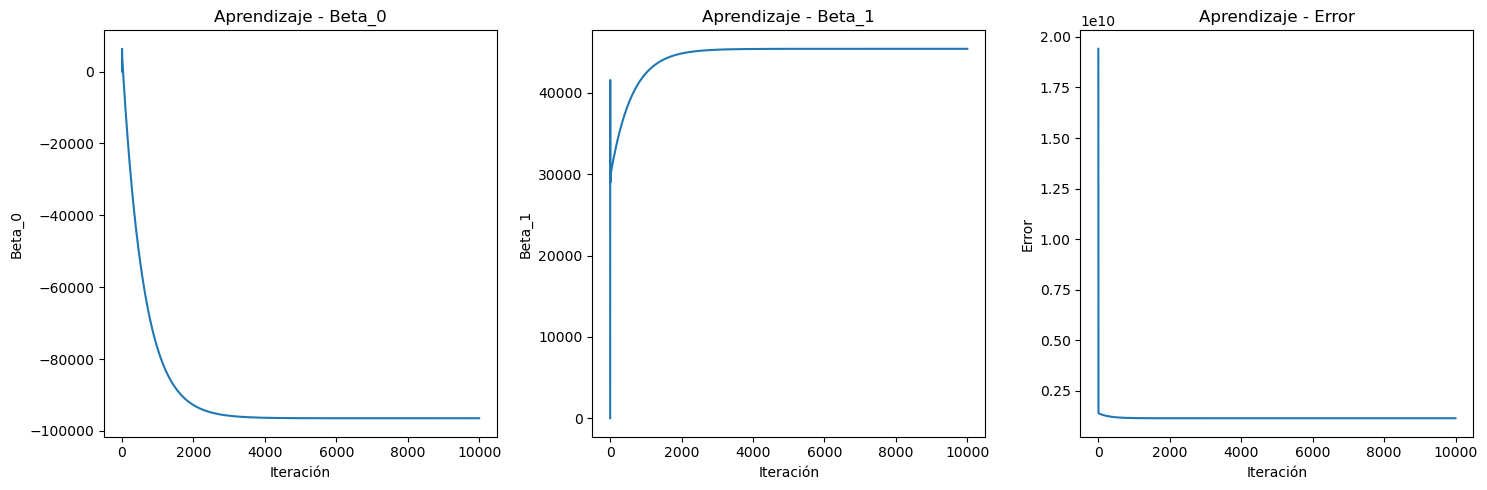

In [16]:
modelo1_manual.plot_model_learning()

Se observa que $\beta_0$ y $\beta_1$ comienza a converger a partir de la iteración 2000, teniendo leves modificaciones desde entonces

La función model_lines presenta cada cierto numero de iteraciones la recta correspondiente que ajusta los datos

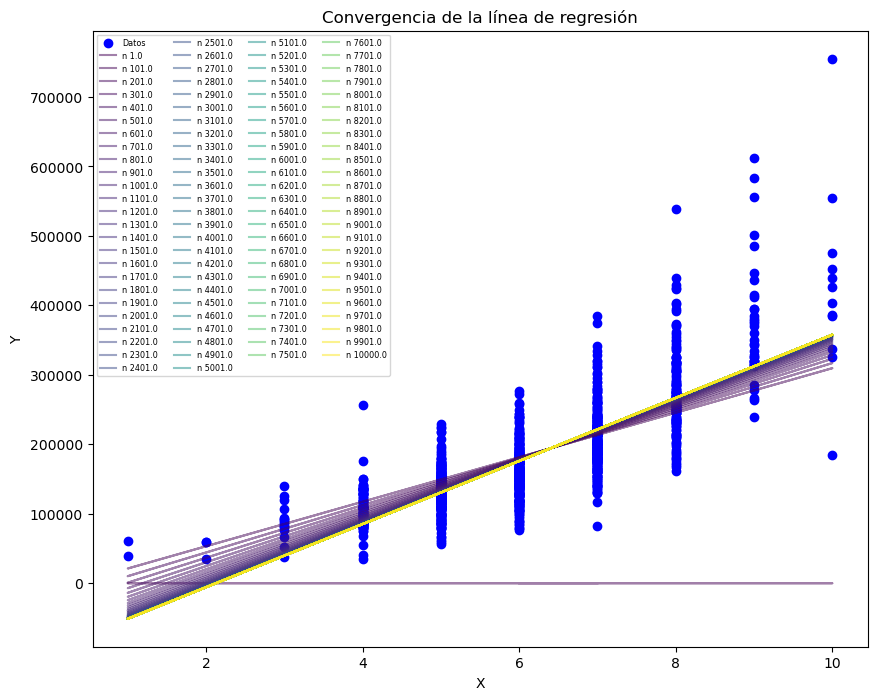

In [17]:
modelo1_manual.model_lines()

La función comparacion realiza un modelo de sklearn y compara los resultados del error y parametros estimados con el modelo manual, 
la función calcula con los valores de validación el error, con el modelo manual, el modelo de sklear y un promedio de ambos, y gráfica los resultados

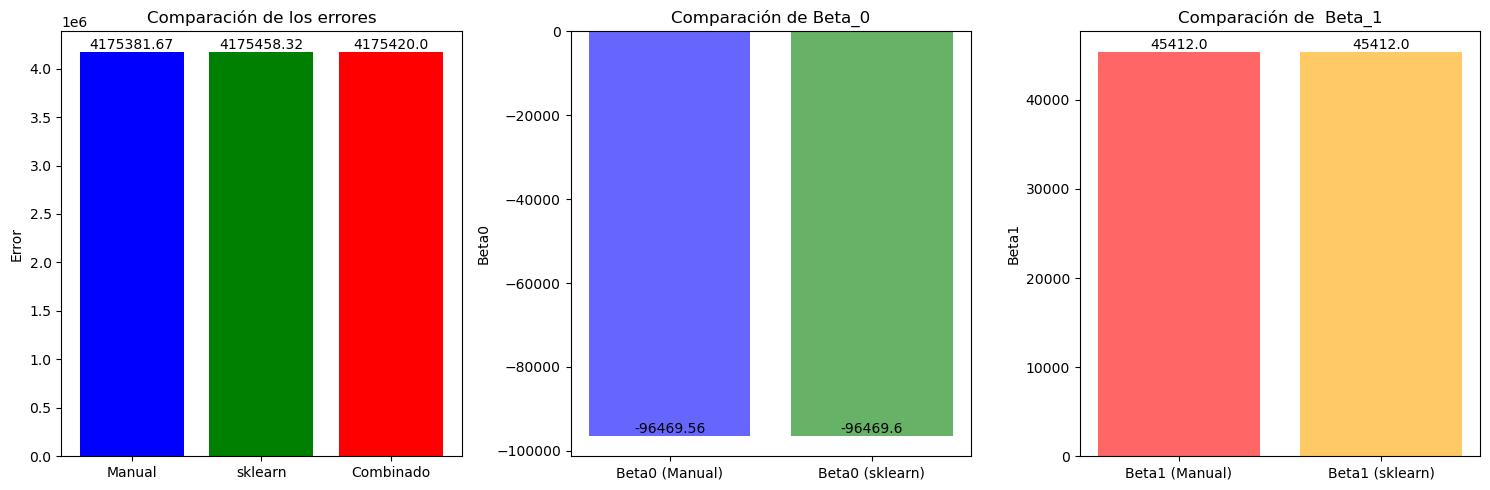

In [18]:
modelo1_manual.comparacion()

**Se observa que el modelo sklearn tiene un menor error, aunque es mínimo, dado que los parámetros encontrados en ambas metodologías es muy similar**

## Modelo 2 manual. Ventas y metros cuadrados del primer piso

In [19]:
# se definen la avriables a utilizar
y = df_train['sales']
x = df_train['ffsf']
y2 = df_val['sales']
x2 = df_val['ffsf']
beta_0 = 0
beta_1 = 0
alpha1= 0.03
alpha2= 0.00000001
epoch=5000

modelo2_manual = proyecto(x=x, y=y, x2=x2,y2=y2,beta_0=0, beta_1=0,alpha1=alpha1,alpha2=alpha2,epoch=5000,n=100,iteraciones=50)

La función grad tiene como resultados la estructura de los datos

In [20]:
modelo2_manual.grad()

,iter,beta_0,beta_1,error
0,1.0,0.00,0.00,1.940972e+10
1,2.0,5417.71,2.27,1.794892e+10
2,3.0,10594.15,4.44,1.661324e+10
3,4.0,15539.91,6.52,1.539196e+10
4,5.0,20265.08,8.52,1.427528e+10
...,...,...,...,...
4995,4996.0,31128.23,129.28,1.924661e+09
4996,4997.0,31127.46,129.28,1.924661e+09
4997,4998.0,31126.70,129.28,1.924661e+09
4998,4999.0,31125.93,129.28,1.924661e+09


La función print_iteracion imprime cada cierto numero de resultados

In [21]:
modelo2_manual.print_iteracion()

En la iteración 1.0, beta cero es de 0.0, beta uno es de 0.0, y el error es de 19409722053.0.
En la iteración 101.0, beta cero es de 115615.51, beta uno es de 56.78, y el error es de 2298547617.0.
En la iteración 201.0, beta cero es de 109115.79, beta uno es de 63.96, y el error es de 2231646130.0.
En la iteración 301.0, beta cero es de 101944.33, beta uno es de 69.99, y el error es de 2178198138.0.
En la iteración 401.0, beta cero es de 95412.59, beta uno es de 75.46, y el error es de 2134054987.0.
En la iteración 501.0, beta cero es de 89476.4, beta uno es de 80.43, y el error es de 2097596591.0.
En la iteración 601.0, beta cero es de 84081.61, beta uno es de 84.94, y el error es de 2067485133.0.
En la iteración 701.0, beta cero es de 79178.83, beta uno es de 89.05, y el error es de 2042615692.0.
En la iteración 801.0, beta cero es de 74723.2, beta uno es de 92.78, y el error es de 2022075702.0.
En la iteración 901.0, beta cero es de 70673.94, beta uno es de 96.17, y el error es de 2

In [22]:
print(f'El valor óptimo de beta_0 es de {modelo2_manual.grad().iloc[-1][1]}, el de beta_1 es {modelo2_manual.grad().iloc[-1][2]} y el error {modelo2_manual.grad().iloc[-1][3]}')

El valor óptimo de beta_0 es de 31125.16, el de beta_1 es 129.28 y el error 1924660546.0


La función plot_model_learning , presenta 3 gráficos con la evolución del modelo

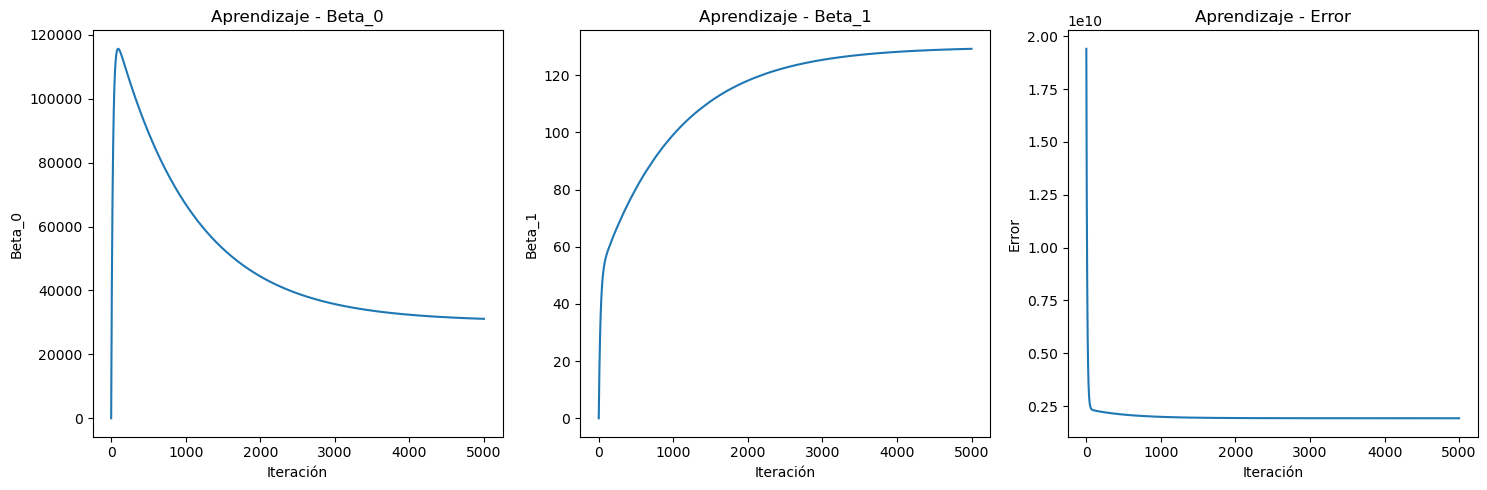

In [23]:
modelo2_manual.plot_model_learning()

Se observa que $\beta_0$ y $\beta_1$ comienza a converger a partir de la iteración 3000, teniendo leves modificaciones desde entonces

La función model_lines presenta cada cierto numero de iteraciones la recta correspondiente que ajusta los datos

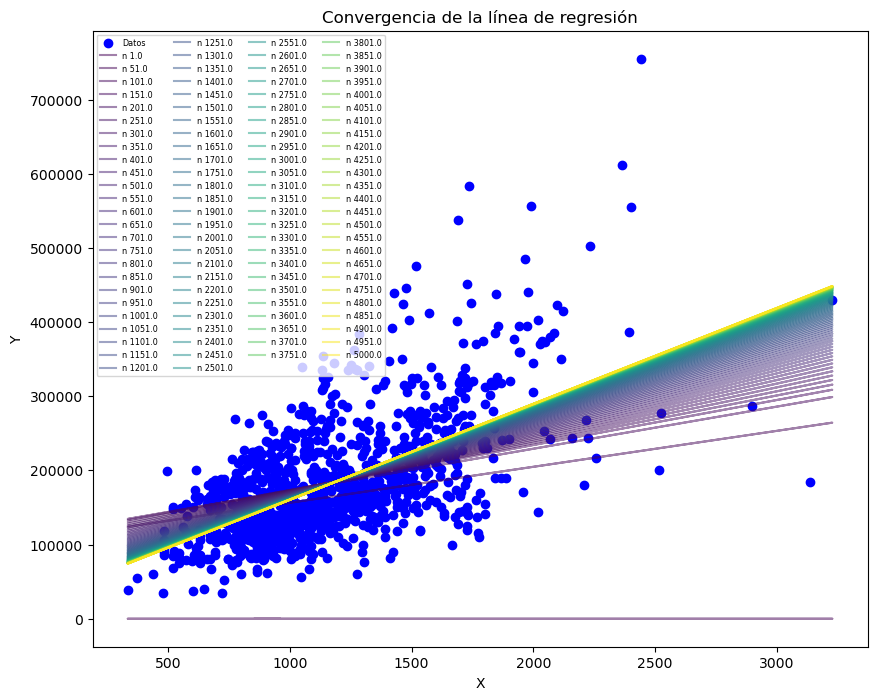

In [24]:
modelo2_manual.model_lines()

La función comparacion realiza un modelo de sklearn y compara los resultados del error y parametros estimados con el modelo manual, 
la función calcula con los valores de validación el error, con el modelo manual, el modelo de sklear y un promedio de ambos, y gráfica los resultados

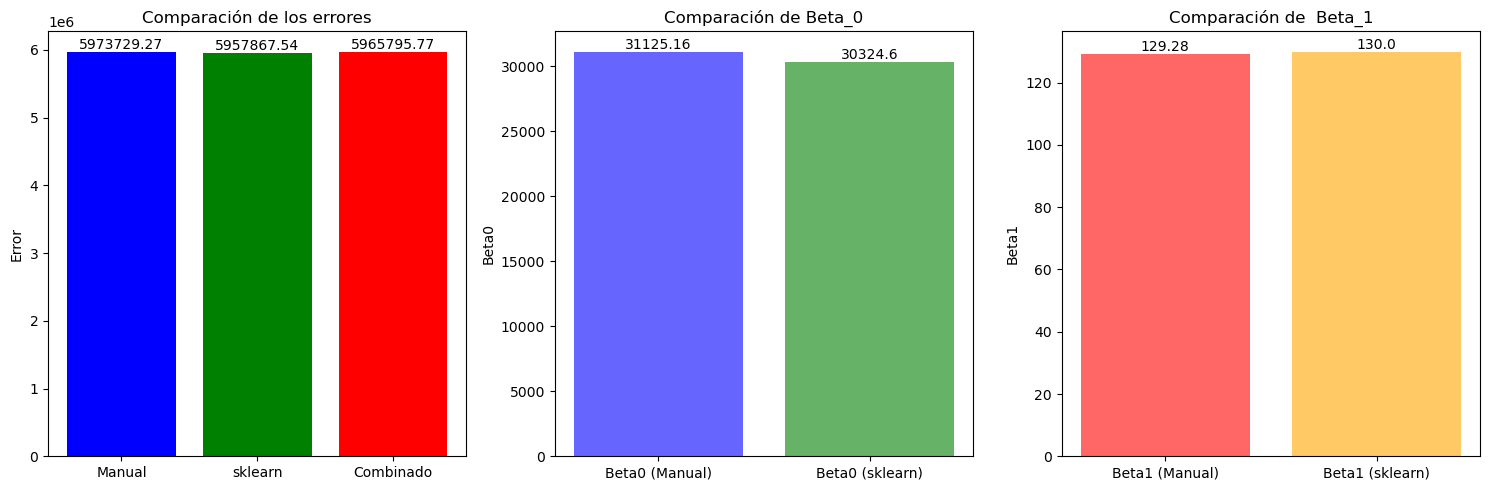

In [25]:
modelo2_manual.comparacion()

**Se observa que el modelo sklearn tiene un menor error, aunque es mínimo, dado que los parámetros encontrados en ambas metodologías es muy similar**

## Subir a GITHUB

In [26]:
cd "Desktop/Maestría/Ciencia de datos con python/Proyecto1"


[WinError 3] El sistema no puede encontrar la ruta especificada: 'Desktop/Maestría/Ciencia de datos con python/Proyecto1'
C:\Users\psantizo\Desktop\Maestría\Ciencia de datos con python\Proyecto1


In [27]:
!git config --global user.email "24000134@galileo.edu"
!git config --global user.name "pjsantizo0607"

In [28]:
!git init

Reinitialized existing Git repository in C:/Users/psantizo/Desktop/MaestrÃ­a/Ciencia de datos con python/Proyecto1/.git/


In [29]:
!git add proyecto1_PabloSantizo.ipynb

In [66]:
!git commit -m "new Commit6"

On branch master
Your branch is up to date with 'repo/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   proyecto1_PabloSantizo.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	dataProyecto.xlsx
	proyecto/
	proyecto1.ipynb
	proyecto1l.ipynb
	proyecto_final.pdf
	proyecto_training_data.npy

no changes added to commit (use "git add" and/or "git commit -a")


In [67]:
!git remote add repo https://github.com/pjsantizo0607/proyecto1.git

error: remote repo already exists.


Push

In [68]:
!git push -f repo master

Everything up-to-date
